<a href="https://colab.research.google.com/github/wkaxnd1119/Pacman_DQN/blob/main/%EA%B8%B0%EC%83%81%EB%8D%B0%EC%9D%B4%ED%84%B0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 사용 패키지
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver

from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import glob
import time
import pandas as pd
import datetime
import seaborn as sns

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [ ]:
# 웹 크롤링을 위한 세팅 (사이트 설정)

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') #내부 창을 띄울 수 없으므로 설정
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver.implicitly_wait(1)
driver.get('https://www.airkorea.or.kr/web/pastSearch?pMENU_NO=123')
driver.implicitly_wait(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  


In [ ]:
# 2014년부터 2019년 까지의 서울 대기오염 지수 자료 추출

def setYear(Year):
    Year = driver.find_element_by_xpath("//option[@value='"+str(Year) + "']")
    Year.click()  
    
def setMonth(Month):
    Month = Month-1
    month = Select(driver.find_element_by_xpath('//*[@id="choice_4"]'))
    month.select_by_index(index=Month)

start_year = 2014
end_year = 2019
end_year = end_year +1

for year in range(start_year,end_year):
    for month in range(1,13):
        print(year)
        print(month)
        setYear(year)
        driver.implicitly_wait(3)
        
        setMonth(month)
        driver.implicitly_wait(3)
        time.sleep(1)
        
        driver.find_element_by_xpath('//*[@id="cont_body"]/div[1]/a[1]').click()
        time.sleep(1)
       
        html = driver.find_element_by_class_name('st_1.stoke').get_attribute('outerHTML')
        if(year == start_year) & (month==1):
            temp = pd.read_html(html)
            df = temp[0]
            print("first")
        else:
            temp = pd.read_html(html)
            table = temp[0]
            print(table.head()) 
            df = pd.concat([df,table])

df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
df.drop(columns='index', inplace =True)

air_seoul = df.copy()

2014
1
first
2014
2
    날짜(년-월-일)  PM10(㎍/㎥)  PM2.5(㎍/㎥)  ...  이산화질소(ppm)  일산화탄소(ppm)  아황산가스(ppm)
0  2014-02-01         26         NaN  ...       0.046         0.4       0.005
1  2014-02-02         21         NaN  ...       0.036         0.4       0.004
2  2014-02-03         63         NaN  ...       0.017         0.2       0.005
3  2014-02-04         36         NaN  ...       0.016         0.1       0.005
4  2014-02-05         43         NaN  ...       0.030         0.3       0.007

[5 rows x 7 columns]
2014
3
    날짜(년-월-일)  PM10(㎍/㎥)  PM2.5(㎍/㎥)  ...  이산화질소(ppm)  일산화탄소(ppm)  아황산가스(ppm)
0  2014-03-01         91         NaN  ...       0.051         0.9       0.009
1  2014-03-02         30         NaN  ...       0.025         0.5       0.006
2  2014-03-03         59         NaN  ...       0.051         0.8       0.010
3  2014-03-04         77         NaN  ...       0.065         1.0       0.011
4  2014-03-05         33         NaN  ...       0.017         0.3       0.006

[5 rows x 7 co

In [ ]:
# 풍향정보 불러오기 (API가 없어 따로 다운받아서 불러오기 진행함)
from google.colab import drive 
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 풍속, 풍향 데이터 Join을 위한 사전 전처리
path = '/content/drive/MyDrive/성균관대학교 대학원/Machine Learning/기상데이터' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    aaa = pd.read_csv(filename, index_col=None, header=0,  encoding = "CP949", engine='python')
   
    li.append(aaa)

wind = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
#사전 전처리 

# Table 조인을 위한 Data type 변경 (Object --> Date)
wind['일시'] = pd.to_datetime(wind['일시'])
air_seoul['날짜(년-월-일)'] = pd.to_datetime(air_seoul['날짜(년-월-일)'])

# 열 이름 변경 
air_seoul.rename(columns={'날짜(년-월-일)':'일시'}, inplace=True)

# Table Join
air_seoul_df = pd.merge(air_seoul, wind, how='left', on='일시')


# 열 삭제
del air_seoul_df['지점'],  air_seoul_df['지점명']

# 결측치 평균값으로 채우기
for i in range(len(air_seoul_df.columns)):
    temp_mean = air_seoul_df[air_seoul_df.columns[i]].mean()
    air_seoul_df[air_seoul_df.columns[i]] = air_seoul_df[air_seoul_df.columns[i]].fillna(temp_mean)


# 미세먼지 농도에 따른 Classfication 함수

def fine_dust(x):
    if x >= 81:
        return 1
    else: return 0
    
def fine_dust_25(x):
    if x >= 36:
        return 1
    else: return 0    


# 미세먼지 PM 10 농도가 150 이상일 시 1, 아니면 0
air_seoul_df['fine_dust_ph10'] = air_seoul_df['PM10(㎍/㎥)'].apply(fine_dust) # 결과: 0: 2063개  1: 128개

# 초미세먼지 PM 2.5 농도가 36 이상일 시 1, 아니면 0
# air_seoul_df['fine_dust_ph2.5'] = air_seoul_df['PM2.5(㎍/㎥)'].apply(fine_dust_25) # 결과 0: 1928개 1: 263개


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 86 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


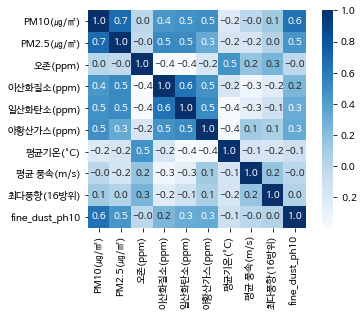

In [ ]:
# 상관관계 분석 
corr = air_seoul_df.corr(method = 'pearson') 

# Heatmap 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.1f', square = True, cmap = 'Blues')





In [ ]:

# 미세먼지 나쁨일 때 평균 풍향 
bad_air_korea = air_seoul_df[air_seoul_df['PM10(㎍/㎥)'] >= 81]
bad_air_korea.describe()


,PM10(㎍/㎥),PM2.5(㎍/㎥),오존(ppm),이산화질소(ppm),일산화탄소(ppm),아황산가스(ppm),평균기온(°C),평균 풍속(m/s),최다풍향(16방위),fine_dust_ph10
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0
mean,109.328125,45.616704,0.023672,0.047120,0.803906,0.006938,9.446875,2.247656,216.406250,1.0
std,49.112134,22.580870,0.015077,0.014228,0.270724,0.002754,7.587339,0.833451,95.346318,0.0
min,81.000000,15.000000,0.003000,0.013000,0.300000,0.002000,-9.800000,0.700000,20.000000,1.0
25%,87.000000,23.409945,0.011750,0.036750,0.600000,0.005000,3.500000,1.700000,200.000000,1.0
50%,97.500000,45.500000,0.021500,0.048000,0.800000,0.006000,8.350000,2.100000,270.000000,1.0
75%,112.250000,62.000000,0.032250,0.057000,1.000000,0.009000,14.750000,2.625000,270.000000,1.0
max,566.000000,122.000000,0.071000,0.088000,1.600000,0.016000,26.800000,5.300000,320.000000,1.0


270.0    45
290.0    23
250.0    12
50.0     12
230.0     9
20.0      9
200.0     5
70.0      5
320.0     4
90.0      2
110.0     2
Name: 최다풍향(16방위), dtype: int64

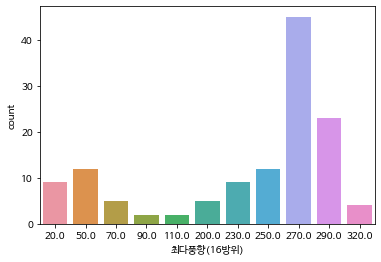

In [ ]:
# 
sns.countplot(x=bad_air_korea['최다풍향(16방위)'], data=bad_air_korea)
bad_air_korea['최다풍향(16방위)'].value_counts()

In [ ]:
# ADASYN을 통한 Oversampling 

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE
SEED=42

from sklearn.model_selection import train_test_split
X = air_seoul_df.iloc[:,1:-1]
y = air_seoul_df.iloc[:,-1]

# Training Test 나누기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


print('Original dataset shape %s' % Counter(y_train))
ada = ADASYN(random_state=SEED)
x_train_res, y_train_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res))


# Regression 문제 해결을 위해 Y 값 재정의 (Classfication --> Regression)
x_train_res = pd.DataFrame(x_train_res)
y_train_res = pd.DataFrame(y_train_res)

new_df = pd.concat([x_train_res, y_train_res], axis=1)
new_df2 = pd.concat([X_test, y_test], axis=1)

# 열 이름 지정
new_df2.columns = [['PM10', 'PM2_5', '오존', '이산화질소', '일산화탄소', '아황산가스', '기온', '풍속', '풍향', '미세먼지나쁨']]

new_df.columns = [['PM10', 'PM2_5', '오존', '이산화질소', '일산화탄소', '아황산가스', '기온', '풍속', '풍향', '미세먼지나쁨']]


Original dataset shape Counter({0: 1651, 1: 101})
Resampled dataset shape Counter({0: 1651, 1: 1649})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:

new_df = pd.concat([new_df, new_df2], axis=0, ignore_index=True)

new_df = new_df[['PM2_5', '오존', '이산화질소', '일산화탄소', '아황산가스', '기온', '풍속', '풍향', '미세먼지나쁨', 'PM10']]



In [ ]:
## 머신러닝 분석

In [ ]:

# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics    
from sklearn.model_selection import cross_val_score
 
# Y 값 다시 설정 (Regression)
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

# X Train, Y Train 분리
X_train = X.iloc[:3300]
X_test = X.iloc[3300:]
y_train = y.iloc[:3300]
y_test = y.iloc[3300:]

# 학습 진행
forest = RandomForestRegressor(n_estimators=1000)
forest.fit(X_train, y_train)
forest.feature_importances_

# 예측
y_pred = forest.predict(X_test)
print(y_pred)
print(list(y_test))
 
# 정확도 확인
print(forest.score(X_train, y_train)) #
print('랜덤포레스트 정확도 : {0:.3f}'.format(forest.score(X_test, y_test)))

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))


[ 54.472       29.027       46.89        57.998       11.604
 102.8329798   27.78877277 178.09850274  62.614       53.35
  30.361       21.031       48.768       42.73388638  26.78388638
  27.33786385  43.78388638  42.22        60.415      109.52112923
  43.86759246  48.22754554  63.013        8.875       48.743
  55.656       39.08931831 134.09883675  57.899       87.84563794
  60.628       23.411       55.711       18.987       43.78
   9.169       91.54140998  43.743       37.99986385  32.115
  30.94620469  44.32218215  31.246       12.706       22.819
  29.453       28.484       41.793       24.74        36.833
  60.862       87.19233728  57.64        14.054       33.961
  45.89988638   6.696       29.364       67.477       43.35688638
  41.862        6.774       45.98520469  47.30977277  49.079
  29.47597746  33.19577277  39.068       35.71        40.79706854
  36.80827323  21.738       19.419       49.263       44.928
  61.665       74.29        39.622       59.55        46.197
 

In [ ]:

### 선형회귀
from sklearn.linear_model import LinearRegression

liner = LinearRegression()
liner.fit(X_train, y_train)

# 예측 
y_pred_linear = liner.predict(X_test)

# 평가 
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_linear)
rmse = mse ** 0.5

print('선형회귀 정확도(Training) : {0:.3f}'.format(liner.score(X_train, y_train)))
print('선형회귀 정확도 : {0:.3f}'.format(liner.score(X_test, y_test)))

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_pred_linear)))

# 절편값, 회귀 계수값
import numpy as np
liner.intercept_
np.round(liner.coef_, 3)

선형회귀 정확도(Training) : 0.791
선형회귀 정확도 : 0.655
MSE : 222.646, RMSE : 14.921
Variance score : 0.655


array([ 3.070000e-01,  1.818780e+02,  3.006670e+02,  5.140000e-01,
        1.856909e+03, -1.540000e-01,  1.230000e+00,  1.700000e-02,
        3.545000e+01])

In [ ]:
X

,PM2_5,오존,이산화질소,일산화탄소,아황산가스,기온,풍속,풍향,미세먼지나쁨
0,22.0,0.036,0.032,0.5,0.005,24.0,2.4,270.0,0
1,22.0,0.024,0.036,0.3,0.006,4.3,2.3,250.0,0
2,32.0,0.035,0.033,0.5,0.004,29.4,1.9,270.0,0
3,23.0,0.013,0.044,0.7,0.004,9.8,3.0,50.0,0
4,8.0,0.014,0.029,0.4,0.003,19.6,2.0,360.0,0
...,...,...,...,...,...,...,...,...,...
3734,31.0,0.030,0.049,0.3,0.006,11.6,2.8,270.0,0
3735,24.0,0.033,0.018,0.3,0.003,0.1,4.0,290.0,0
3736,14.0,0.014,0.037,0.4,0.002,26.4,2.0,110.0,0
3737,15.0,0.009,0.042,0.6,0.002,25.7,1.4,50.0,0
